# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 18 - Regresión Logística VI: Random Forest
### Pilar García y Sonia Ruiz Pérez

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming:

In [2]:
#Librerías
# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Separación de datos en 'train' y 'test'
from sklearn.model_selection import train_test_split

# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Métricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, roc_auc_score

pd.options.display.max_columns=None

In [3]:
#Creamos un dataframe con el csv de los datos que nos interesan.
df=pd.read_csv('files/heart_eda_principal_encoding_estandar.csv',index_col=0)
df.head(3)

,age,resting_bp,cholesterol,fasting_bs,max_hr,oldpeak,heart_disease,male,chest_pain_type_ASY,chest_pain_type_ATA,chest_pain_type_NAP,chest_pain_type_TA,resting_ecg_LVH,resting_ecg_Normal,resting_ecg_ST,exercise_angina_yes,st_slope_Down,st_slope_Flat,st_slope_Up
0,-1.334331,0.548422,0.984547,-0.44069,1.290461,-0.864955,0,1,0,1,0,0,0,1,0,0,0,0,1
1,-0.390470,1.845686,-1.182352,-0.44069,0.633456,0.178110,1,0,0,0,1,0,0,1,0,0,0,1,0
2,-1.648952,-0.100209,0.865268,-0.44069,-1.748185,-0.864955,0,1,0,1,0,0,0,0,1,0,0,0,1


- Ajustad un modelo de Random Forest a nuestros datos.

In [5]:
# Separamos los datos en X e y
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]
# Separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Tomamos los hiperparámetros del Decision Tree que mejores métricas nos dieron.
# Definimos un diccionario con los hiperparámetros
param = {"max_depth": [4,5,7], "max_features": [1,2,3,4], "min_samples_split": [40, 50, 75], "min_samples_leaf": [8, 10, 15]}

# Ajustar el modelo con GridSearchCV
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param, cv=10, verbose=-1)

# Ajustamos el modelo
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 7], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [8, 10, 15],
                         'min_samples_split': [40, 50, 75]},
             verbose=-1)

In [7]:
#Obtenemos los hiperparámetros más parsimoniosos
bosque=grid.best_estimator_
bosque

RandomForestClassifier(max_depth=7, max_features=1, min_samples_leaf=8,
                       min_samples_split=40, random_state=42)

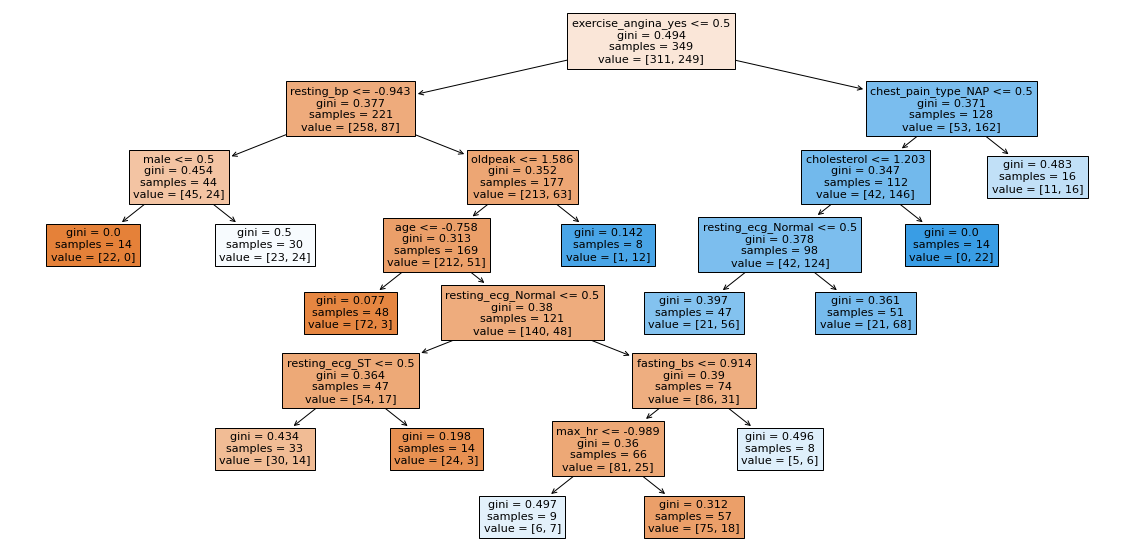

In [13]:
#Representamos gráficamente el Random Forest, pero solo representaremos un árbol de ejemplo.
plt.figure(figsize=(20,10))
tree.plot_tree(bosque.estimators_[3],feature_names=x_train.columns,filled=True)
plt.show()

`Este árbol corresponde al árbol con índice 3 del Rnadom Forest generado, donde podemos ver cómo se van ramificando los nodos. `

- Calculad las métricas a nuestro nuevo modelo.

In [14]:
#Hacemos las predicciones para calcular las métricas de nuestro modelo de Random Forest
y_pred_test=bosque.predict(x_test)
y_pred_train=bosque.predict(x_train)

In [15]:
# Creamos una función para obtener las métricas del modelo Random Forest.
def obtener_metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    resultados = {
        'accuracy': [accuracy_score(y_test, y_test_pred), accuracy_score(y_train, y_train_pred)],
        'precision': [precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)], 
        'recall': [recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)],
        'f1': [f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)],
        'kappa': [cohen_kappa_score(y_test, y_test_pred), cohen_kappa_score(y_train, y_train_pred)],
        "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [16]:
# Llamamos a la función.
df_resultados = obtener_metricas(y_test, y_train, y_pred_test, y_pred_train, "Random Forest Codificadas Estandarizadas")
df_resultados

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.879433,0.890411,0.878378,0.884354,0.758440,test,Random Forest Codificadas Estandarizadas
1,0.875000,0.871901,0.844000,0.857724,0.746311,train,Random Forest Codificadas Estandarizadas


- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [17]:
#Creamos un dataframe con las métricas obtenidas en los anteriores análisis.
df_resultados_anteriores=pd.read_csv('files/resultados_heart_logisticareg_decisiontree.csv',index_col=0)
df_resultados_anteriores

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.879433,0.880000,0.891892,0.885906,0.758099,test,Regresión Logística Codificadas
1,0.857143,0.832031,0.852000,0.841897,0.711637,train,Regresión Logística Codificadas
0,0.886525,0.891892,0.891892,0.891892,0.772489,test,Regresión Logística Codificadas y Estandarizadas
1,0.860714,0.838583,0.852000,0.845238,0.718629,train,Regresión Logística Codificadas y Estandarizadas
0,0.822695,0.855072,0.797297,0.825175,0.645764,test,Decision Tree Codificadas Estandarizadas I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree Codificadas Estandarizadas I
0,0.865248,0.816092,0.959459,0.881988,0.727328,test,Decision Tree Codificadas Estandarizadas II
1,0.817857,0.741830,0.908000,0.816547,0.639303,train,Decision Tree Codificadas Estandarizadas II
0,0.836879,0.780220,0.959459,0.860606,0.668980,test,Decision Tree Codificadas Estandarizadas III
1,0.821429,0.745098,0.912000,0.820144,0.646375,train,Decision Tree Codificadas Estandarizadas III


In [18]:
#Unimos las métricas obtenidas en el Random Forest con las anteriores.
df_resultados_unido=pd.concat([df_resultados_anteriores,df_resultados],axis=0)
df_resultados_unido

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.879433,0.880000,0.891892,0.885906,0.758099,test,Regresión Logística Codificadas
1,0.857143,0.832031,0.852000,0.841897,0.711637,train,Regresión Logística Codificadas
0,0.886525,0.891892,0.891892,0.891892,0.772489,test,Regresión Logística Codificadas y Estandarizadas
1,0.860714,0.838583,0.852000,0.845238,0.718629,train,Regresión Logística Codificadas y Estandarizadas
0,0.822695,0.855072,0.797297,0.825175,0.645764,test,Decision Tree Codificadas Estandarizadas I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree Codificadas Estandarizadas I
0,0.865248,0.816092,0.959459,0.881988,0.727328,test,Decision Tree Codificadas Estandarizadas II
1,0.817857,0.741830,0.908000,0.816547,0.639303,train,Decision Tree Codificadas Estandarizadas II
0,0.836879,0.780220,0.959459,0.860606,0.668980,test,Decision Tree Codificadas Estandarizadas III
1,0.821429,0.745098,0.912000,0.820144,0.646375,train,Decision Tree Codificadas Estandarizadas III


`Observando las métricas obtenidas vemos que al realizar el Random Forest tenemos menor diferencia entre los datos de test y train, siendo buenos resultados. Pero en la Regresión Logística Codificada y Estandarizada, tenemos mejores resultados en las métricas de test (un leve underfitting), especialmente nos interesa el recall, ya que nuestro modelo predice si un paciente tiene fallo cardiaco. Por tanto nos decidiremos por uno u otro dependiendo de lo que tengamos en cuenta. Lo adecuado sería continuar cambiando los hiperparámetros e incluso la division de los datos al hacer el train_test_split, para intentar obtener unas métricas con mejores resultados en el Random Forest y no tener dudas a la hora de decidir.`

In [20]:
#Obtenemos la importancia de las variables predictoras.
importancia_predictoras=pd.DataFrame({'predictora':x_train.columns,'importancia':bosque.feature_importances_})

#Ordenamos de mayor a menor los resultados de las importancias.
importancia_predictoras.sort_values(by=['importancia'],ascending=False,inplace=True)
importancia_predictoras.reset_index(inplace=True)
importancia_predictoras.drop(['index'],axis=1,inplace=True)
importancia_predictoras

,predictora,importancia
0,st_slope_Up,0.151581
1,st_slope_Flat,0.138346
2,oldpeak,0.122963
3,chest_pain_type_ASY,0.116776
4,age,0.093154
5,exercise_angina_yes,0.082833
6,max_hr,0.058603
7,chest_pain_type_ATA,0.053271
8,male,0.051068
9,chest_pain_type_NAP,0.029733


In [21]:
#Agrupamos columnas que corresponden a las diferentes categorías de la misma variable.
st_slope=importancia_predictoras.iloc[[0,1,14]]
st_slope

,predictora,importancia
0,st_slope_Up,0.151581
1,st_slope_Flat,0.138346
14,st_slope_Down,0.009691


In [22]:
resting_ecg=importancia_predictoras.iloc[[13,15,17]]
resting_ecg

,predictora,importancia
13,resting_ecg_Normal,0.009981
15,resting_ecg_LVH,0.008168
17,resting_ecg_ST,0.003820


In [23]:
chest_pain_type=importancia_predictoras.iloc[[3,7,9,16]]
chest_pain_type

,predictora,importancia
3,chest_pain_type_ASY,0.116776
7,chest_pain_type_ATA,0.053271
9,chest_pain_type_NAP,0.029733
16,chest_pain_type_TA,0.004685


In [24]:
#Eliminamos las filas que vamos a sustituir.
importancia_predictoras.drop(st_slope.index,inplace=True)
importancia_predictoras.drop(resting_ecg.index,inplace=True)
importancia_predictoras.drop(chest_pain_type.index,inplace=True)
importancia_predictoras

,predictora,importancia
2,oldpeak,0.122963
4,age,0.093154
5,exercise_angina_yes,0.082833
6,max_hr,0.058603
8,male,0.051068
10,resting_bp,0.029445
11,cholesterol,0.019650
12,fasting_bs,0.016233


In [25]:
#Añadimos las filas con las importancias unificadas en los índices eliminados.
importancia_predictoras.loc[0]=['st_slope',st_slope['importancia'].sum()]
importancia_predictoras.loc[1]=['resting_ecg',resting_ecg['importancia'].sum()]
importancia_predictoras.loc[3]=['chest_pain_type',chest_pain_type['importancia'].sum()]
importancia_predictoras.sort_values(by=['importancia'],ascending=False,inplace=True)
importancia_predictoras

,predictora,importancia
0,st_slope,0.299619
3,chest_pain_type,0.204465
2,oldpeak,0.122963
4,age,0.093154
5,exercise_angina_yes,0.082833
6,max_hr,0.058603
8,male,0.051068
10,resting_bp,0.029445
1,resting_ecg,0.021968
11,cholesterol,0.019650


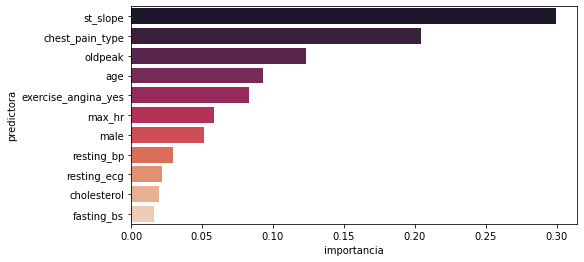

In [26]:
#Representación gráfica de la importancia.
plt.figure(figsize=(8,4))
sns.barplot(x='importancia',y='predictora',data=importancia_predictoras,palette='rocket')
plt.show();

`Al representar la importancia de las variables empleadas en el modelo, podemos ver que la variable con mayor importancia es 'st_slope' (al igual que en el Decision Tree), ayuda en un 30% a explicar la variable respuesta en el modelo. La segunda variable con más importancia es 'chest_pain_type', que interviene en un 20%. Y en tercera posición 'oldpeak' ayuda a explicar la importancia de la variable respuesta en un 12%. El resto de variables suponen el 38% restante. `

In [19]:
#guardamos el dataframe con los resultados de todas las métricas.
df_resultados_unido.to_csv=('files/resultados_heart_logisticareg_decisiontree_rforest.csv')

**Happy coding** 📊📈📉